## Compare grit in two simulated cases:

1. Permuted with random shuffles
2. Titrating different number of controls

In [1]:
import pathlib
import pandas as pd
import plotnine as gg

In [2]:
output_dir = pathlib.Path("figures")
output_dir.mkdir(exist_ok=True)
cell_health_dir = pathlib.Path("../../1.calculate-metrics/cell-health/results")

In [3]:
plate = "SQ00014613"

In [4]:
# Load randomly shuffled grit scores
file = pathlib.Path(f"{cell_health_dir}/cell_health_grit_randomshuffled_{plate}.tsv")

permuted_grit_df = pd.read_csv(file, sep="\t").dropna()

permuted_grit_df.random_iteration = permuted_grit_df.random_iteration.astype(str)

permuted_grit_df.shuffle_method = pd.Categorical(
    permuted_grit_df.shuffle_method.replace(
        {
            "independent_column": "All columns shuffled",
            "full_metadata_shuffle": "Only metadata shuffled",
            "metadata_shuffle_ctrl_fixed": "Only metadata shuffled (controls fixed)",
            "real": "Real"
        }
    ),
    categories=["All columns shuffled", "Only metadata shuffled", "Only metadata shuffled (controls fixed)", "Real"]
)

print(permuted_grit_df.shape)
permuted_grit_df.head()

(1808, 8)


,perturbation,group,grit,cell_line,barcode_control,cor_method,random_iteration,shuffle_method
0,AKT1-1,AKT1,-0.038195,ES2,cutting_control,pearson,0,All columns shuffled
1,AKT1-2,AKT1,-0.071214,ES2,cutting_control,pearson,0,All columns shuffled
2,ARID1B-1,ARID1B,0.333085,ES2,cutting_control,pearson,0,All columns shuffled
3,ARID1B-2,ARID1B,0.560773,ES2,cutting_control,pearson,0,All columns shuffled
4,ATF4-1,ATF4,0.562125,ES2,cutting_control,pearson,0,All columns shuffled


In [5]:
permuted_grit_df.shuffle_method.value_counts()

All columns shuffled                       565
Only metadata shuffled                     565
Only metadata shuffled (controls fixed)    565
Real                                       113
Name: shuffle_method, dtype: int64

In [6]:
# Compare grit with different number of controls in calculation
file = pathlib.Path(f"{cell_health_dir}/cell_health_grit_control_titration_{plate}.tsv")

titration_grit_df = pd.read_csv(file, sep="\t").dropna()

titration_grit_df.num_controls = pd.Categorical(
    titration_grit_df.num_controls.astype(str),
    categories=[str(x) for x in sorted(titration_grit_df.num_controls.unique())]
)

titration_grit_df.random_iteration = titration_grit_df.random_iteration.astype(str)

print(titration_grit_df.shape)
titration_grit_df.head()

(6780, 8)


,perturbation,group,grit,cell_line,barcode_control,cor_method,random_iteration,num_controls
0,AKT1-1,AKT1,1.458837,ES2,perturbation_control,pearson,0,56
1,AKT1-2,AKT1,1.203577,ES2,perturbation_control,pearson,0,56
2,ARID1B-1,ARID1B,1.331120,ES2,perturbation_control,pearson,0,56
3,ARID1B-2,ARID1B,1.190342,ES2,perturbation_control,pearson,0,56
4,ATF4-1,ATF4,2.223579,ES2,perturbation_control,pearson,0,56


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/cell_health_grit_permuted_comparison.png


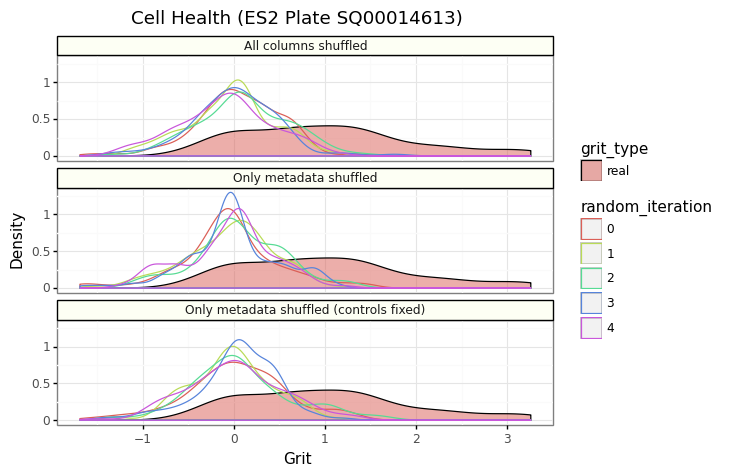

<ggplot: (284115863)>

In [7]:
cell_health_update_df = (
    permuted_grit_df
    .query("barcode_control == 'cutting_control'")
    .query("cor_method == 'pearson'")
    .query("random_iteration == 'real'")
    .query("shuffle_method == 'Real'")
    .assign(grit_type="real")
)
cell_health_update_df.shuffle_method = "All columns shuffled"

cell_health_update_construct_df = (
    permuted_grit_df
    .query("barcode_control == 'cutting_control'")
    .query("cor_method == 'pearson'")
    .query("random_iteration == 'real'")
    .query("shuffle_method == 'Real'")
    .assign(grit_type="real")
)

cell_health_update_construct_df.shuffle_method = "Only metadata shuffled"

cell_health_update_construct_two_df = (
    permuted_grit_df
    .query("barcode_control == 'cutting_control'")
    .query("cor_method == 'pearson'")
    .query("random_iteration == 'real'")
    .query("shuffle_method == 'Real'")
    .assign(grit_type="real")
)

cell_health_update_construct_two_df.shuffle_method = "Only metadata shuffled (controls fixed)"

cell_health_update_df = pd.concat(
    [cell_health_update_df, cell_health_update_construct_df, cell_health_update_construct_two_df],
    axis="rows"
)

grit_permuted_gg = (
    gg.ggplot(
        gg.aes(x="grit")
    ) +
    gg.geom_density(gg.aes(fill="grit_type"), data=cell_health_update_df, alpha=0.5) +
    gg.geom_density(gg.aes(color="random_iteration"),
                    data=permuted_grit_df.query("random_iteration != 'real'"),
                    alpha=0.5) +
    gg.theme_bw() +
    gg.xlab("Grit") +
    gg.ylab("Density") +
    gg.ggtitle(f"Cell Health (ES2 Plate {plate})") +
    gg.facet_wrap("~shuffle_method", nrow=3) +
    gg.theme(strip_background=gg.element_rect(color="black", fill="#fdfff4"))
)

output_file = pathlib.Path(f"{output_dir}/cell_health_grit_permuted_comparison.png")
grit_permuted_gg.save(output_file, dpi=500, height=5, width=4)

grit_permuted_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 3.5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/cell_health_grit_controltitration.png


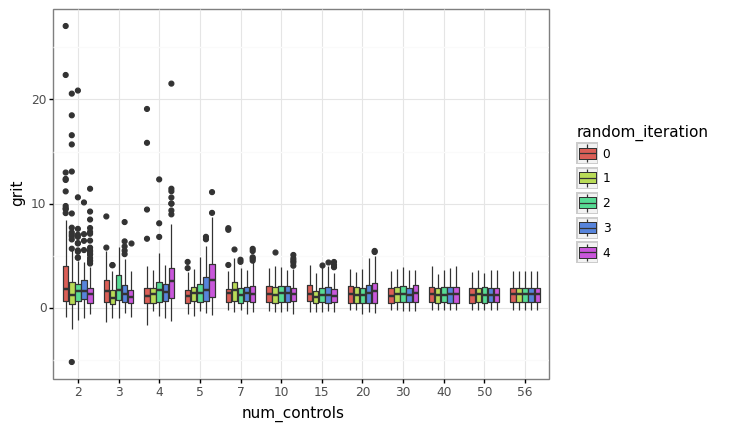

<ggplot: (410115069)>

In [8]:
grit_control_count_gg = (
    gg.ggplot(titration_grit_df, gg.aes(x="num_controls", y="grit"))
    + gg.geom_boxplot(gg.aes(fill="random_iteration"))
    + gg.theme_bw()
)

output_file = pathlib.Path(f"{output_dir}/cell_health_grit_controltitration.png")
grit_control_count_gg.save(output_file, dpi=500, height=3.5, width=4)

grit_control_count_gg